In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

df.drop(columns=['user_id', 'Unnamed: 15'], inplace=True) # Drop irrelevant column

print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64


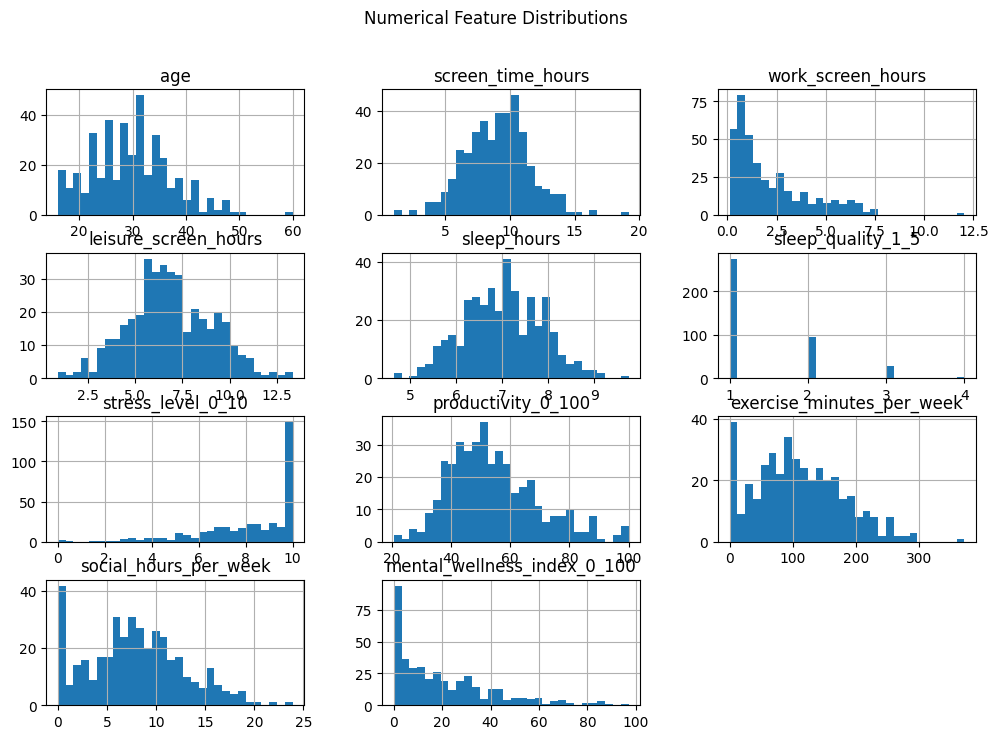

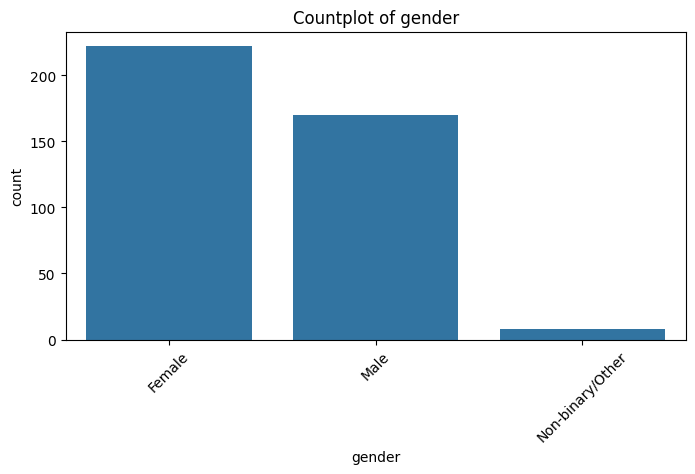

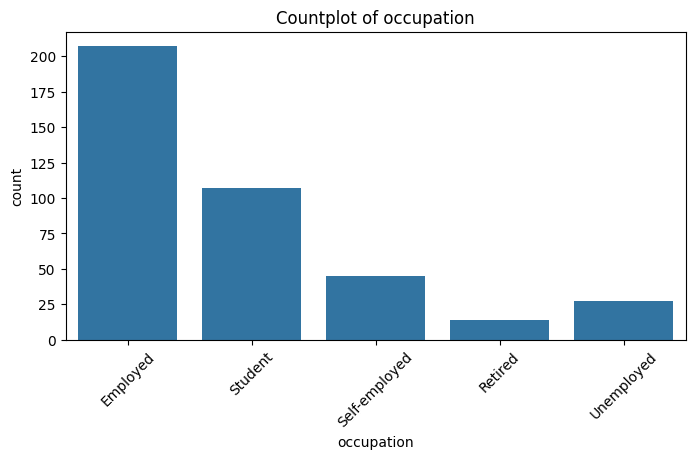

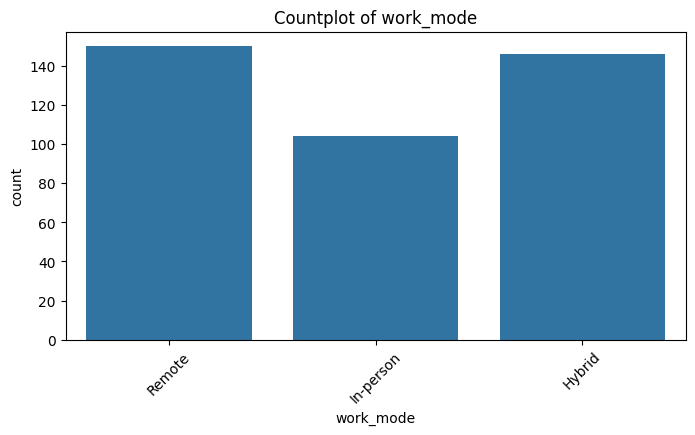

In [2]:
# Plot distributions for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Plot countplots for categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

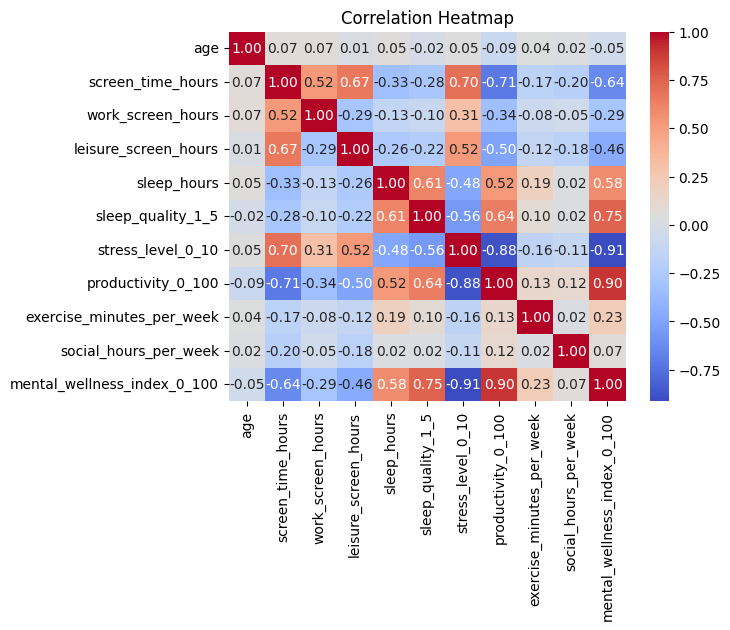

In [3]:
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

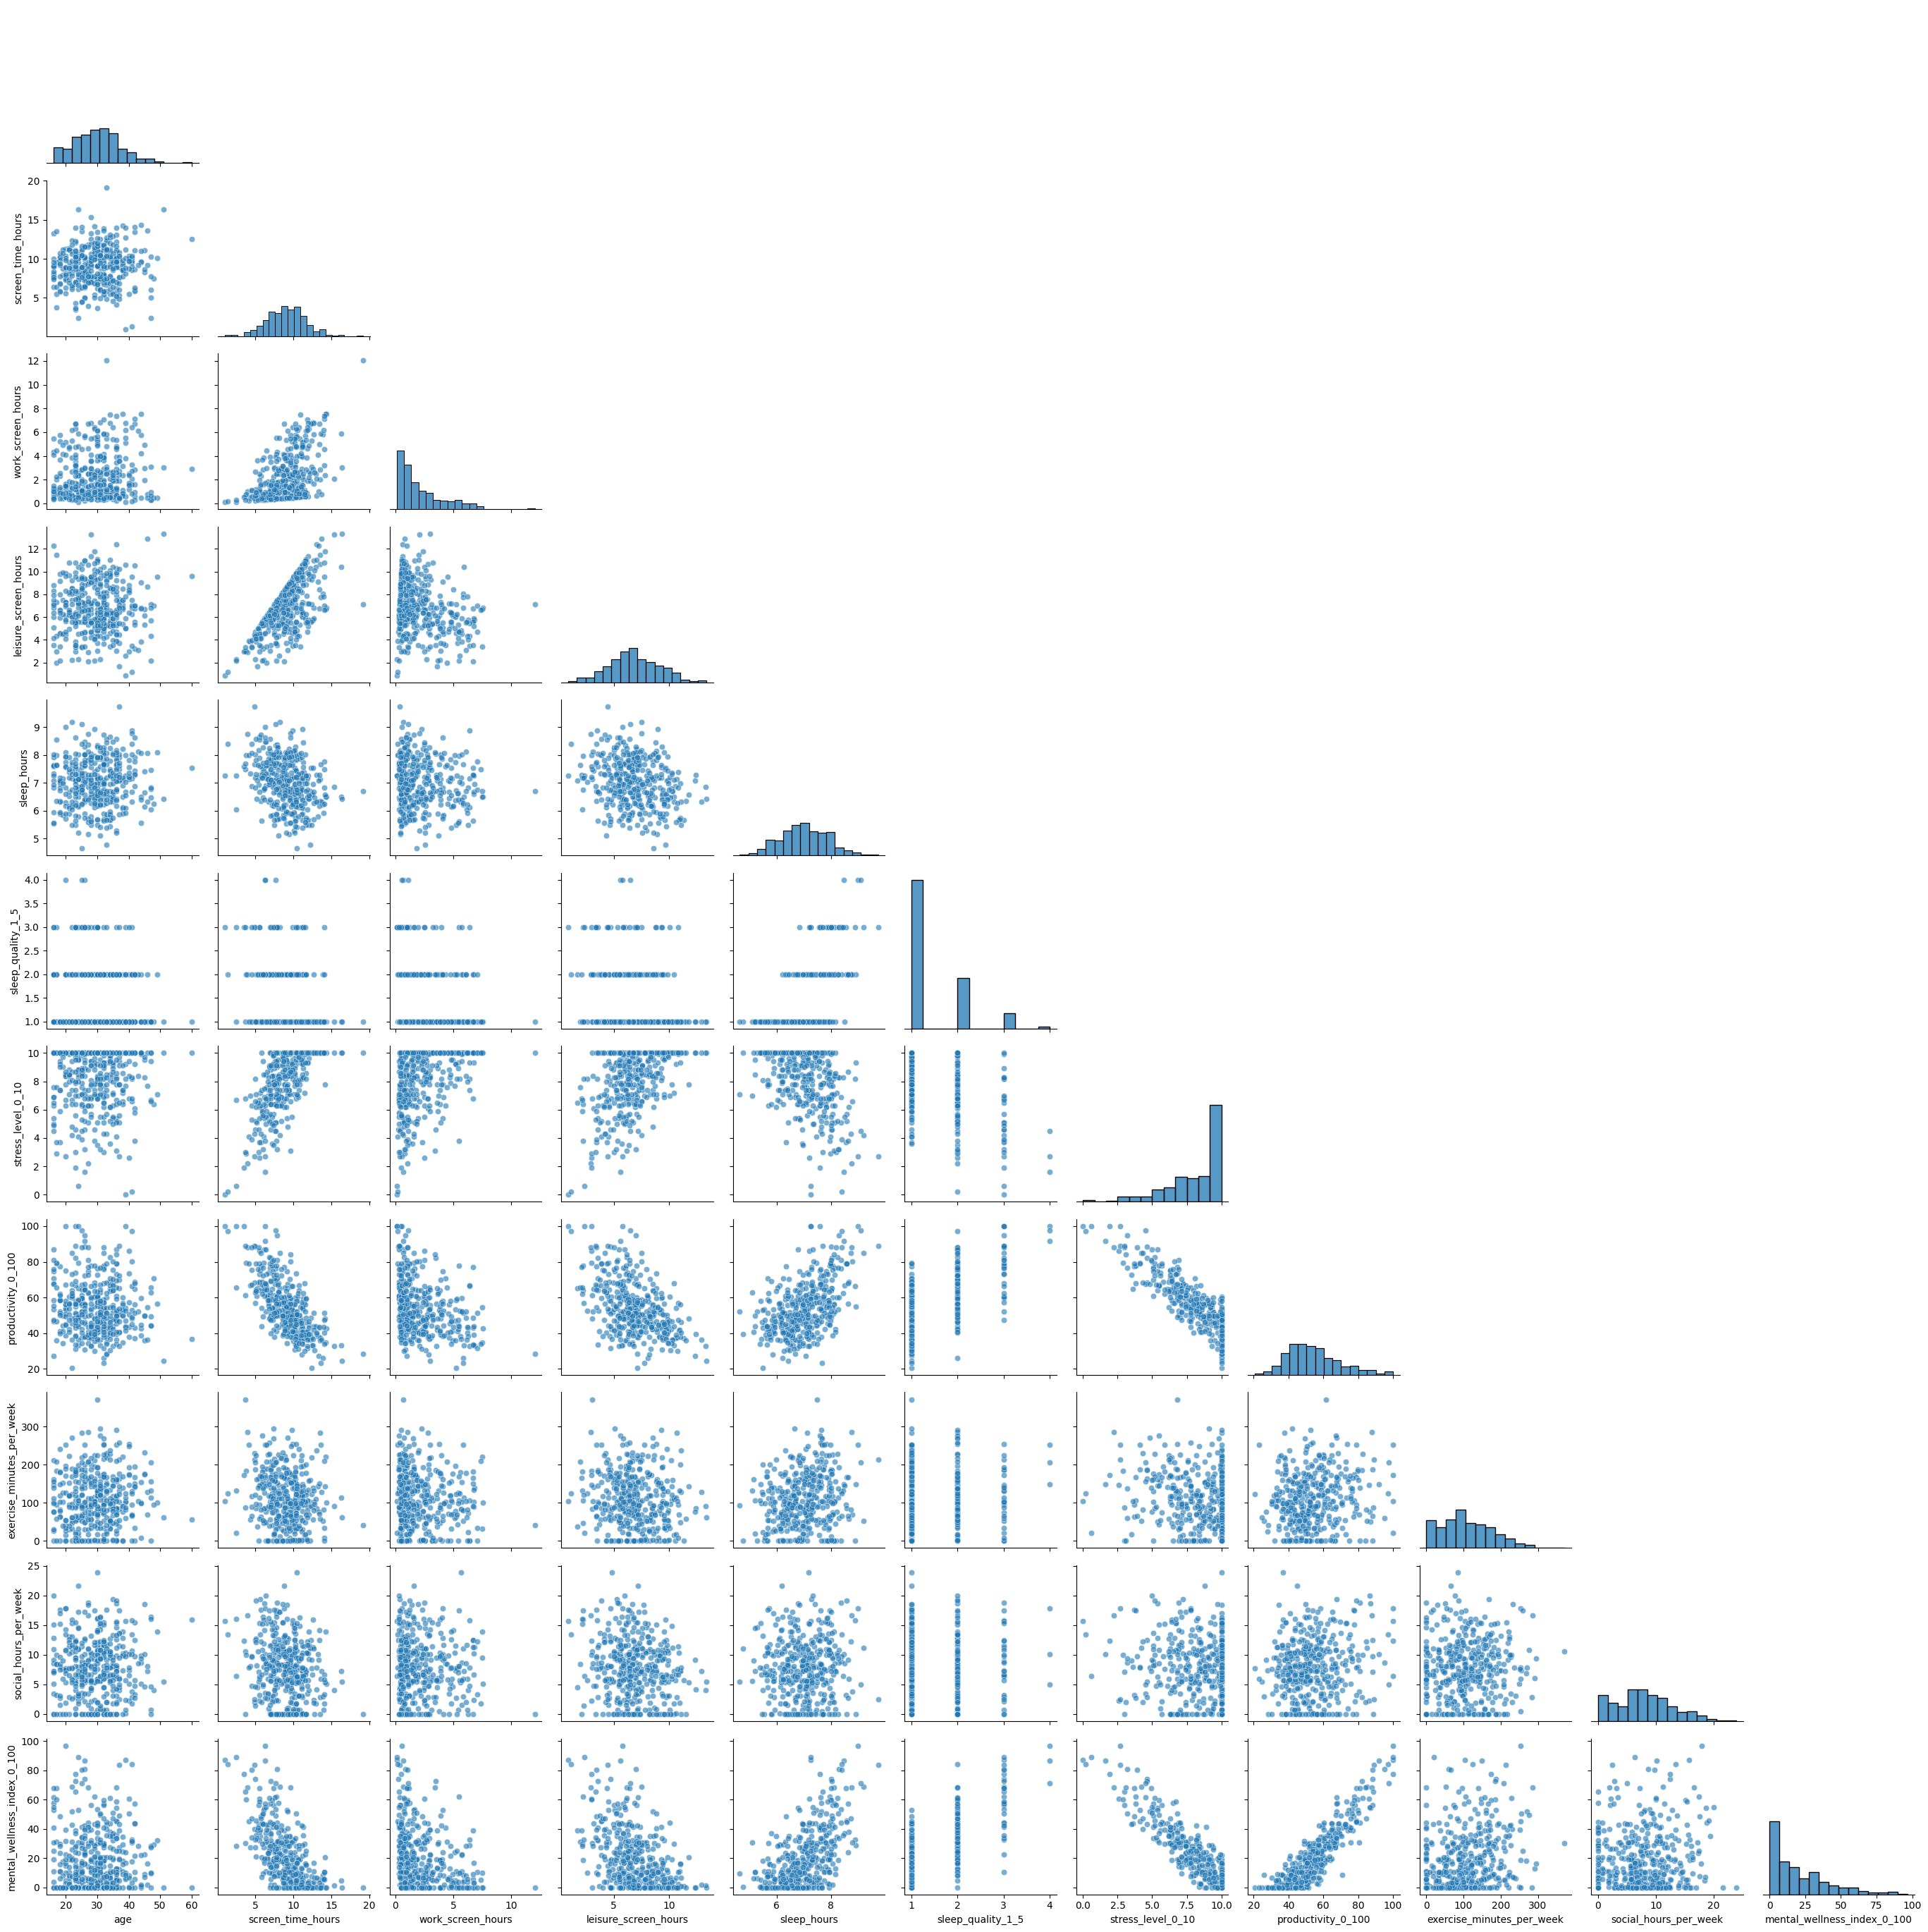

In [4]:
# Pairplot for a snapshot of numerical relationships
sns.pairplot(df[num_cols], diag_kind='hist', corner=True, plot_kws={'alpha': 0.6})
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = df.drop(columns=['mental_wellness_index_0_100'])
y = df['mental_wellness_index_0_100']

# Keep only numerical columns
num_cols_X = [col for col in num_cols if col in X.columns]
X_num = X[num_cols_X]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=42)

# Build pipeline: scaling + linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
score_lr = r2_score(y_test, y_pred)
print('Linear Regression R^2 Score (numerical features only):', score_lr)

# Coefficients
feature_names = X_train.columns
coefficients = pipeline.named_steps['regressor'].coef_

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


Linear Regression R^2 Score (numerical features only): 0.9369540217402836
age: -0.1749
screen_time_hours: -0.2228
work_screen_hours: -0.1474
leisure_screen_hours: -0.1258
sleep_hours: 0.1549
sleep_quality_1_5: 5.9449
stress_level_0_10: -10.4618
productivity_0_100: 4.6400
exercise_minutes_per_week: 1.5459
social_hours_per_week: -0.2844


In [26]:
import joblib

joblib.dump(pipeline, "mental_wellness_model.pkl")

['mental_wellness_model.pkl']

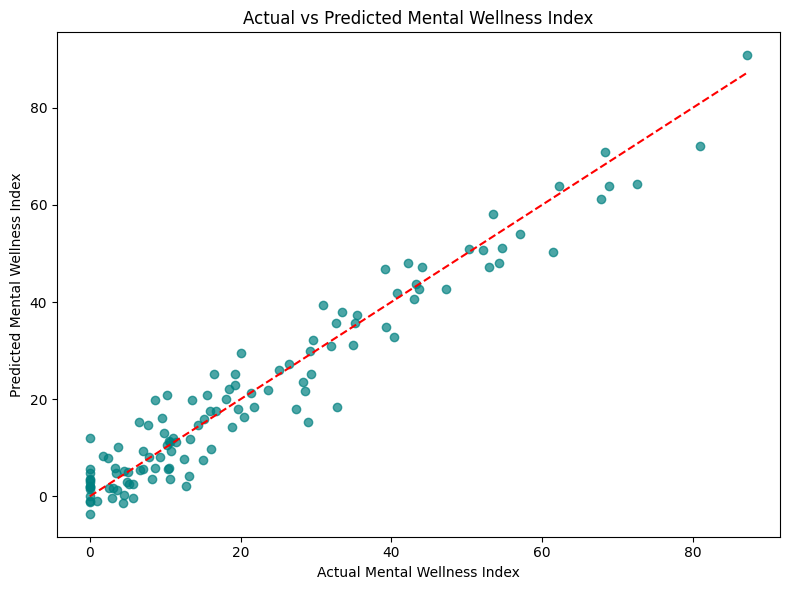

In [19]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel('Actual Mental Wellness Index')
plt.ylabel('Predicted Mental Wellness Index')
plt.title('Actual vs Predicted Mental Wellness Index')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

<Axes: >

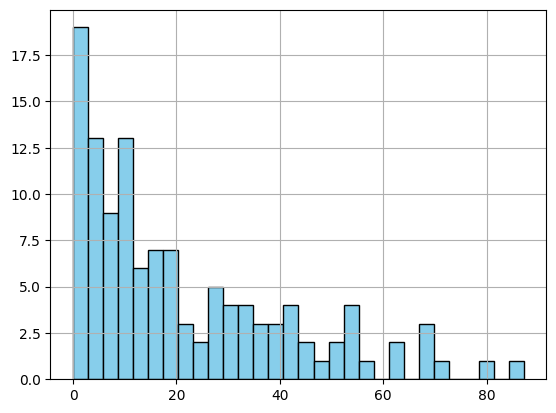

In [22]:
y_test.hist(bins=30, color='skyblue', edgecolor='black')

In [24]:
my_y = 45.4

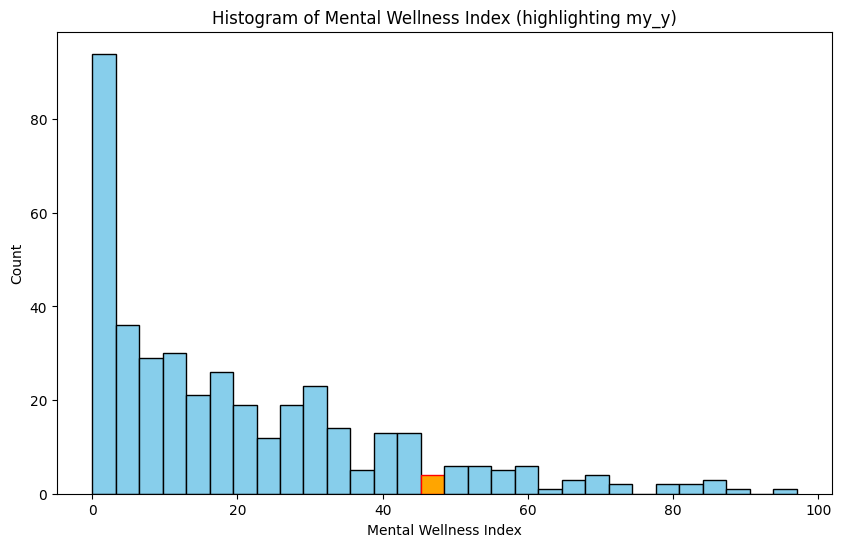

In [25]:
# Plot histogram of y and highlight the bin containing my_y
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(y, bins=30, color='skyblue', edgecolor='black')

# Find the bin index for my_y
bin_index = None
for i in range(len(bins)-1):
    if bins[i] <= my_y < bins[i+1]:
        bin_index = i
        break

if bin_index is not None:
    patches[bin_index].set_facecolor('orange')
    patches[bin_index].set_edgecolor('red')

plt.xlabel('Mental Wellness Index')
plt.ylabel('Count')
plt.title('Histogram of Mental Wellness Index (highlighting my_y)')
plt.show()